In [21]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Print the column names
print(data.columns)


Index(['IncidenceId', 'DistrictName', 'Year', 'AccidentTime', 'AccidentPlace',
       'AccidentType', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName',
       'CauseOfAccident', 'Reason'],
      dtype='object')


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Clean up column names (remove leading/trailing spaces if any)
data.columns = data.columns.str.strip()

# Check if 'AccidentType' exists after cleaning
if 'AccidentType' in data.columns:
    print("AccidentType column found.")
else:
    print("AccidentType column not found.")

# Encode the target feature 'AccidentType' using LabelEncoder
label_encoder = LabelEncoder()
data['AccidentType'] = label_encoder.fit_transform(data['AccidentType'])

# Split the data into features (X) and target (y)
X = data.drop('AccidentType', axis=1)  # Features
y = data['AccidentType']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proceed with your model training


AccidentType column found.


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Clean up column names (remove leading/trailing spaces if any)
data.columns = data.columns.str.strip()

# Encode the target feature 'AccidentType' using LabelEncoder
label_encoder = LabelEncoder()
data['AccidentType'] = label_encoder.fit_transform(data['AccidentType'])

# Identify categorical columns for encoding (excluding 'AccidentType' which is already encoded)
categorical_features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 
                        'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']

# OneHotEncode the categorical features
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[categorical_features])

# Create a DataFrame for encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with the original data (drop original categorical columns)
data = pd.concat([data.drop(columns=categorical_features), encoded_df], axis=1)

# Split the data into features (X) and target (y)
X = data.drop('AccidentType', axis=1)  # Features
y = data['AccidentType']  # Target

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy:  0.9337349397590361
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.94      0.99      0.97       153

    accuracy                           0.93       166
   macro avg       0.84      0.61      0.66       166
weighted avg       0.92      0.93      0.92       166



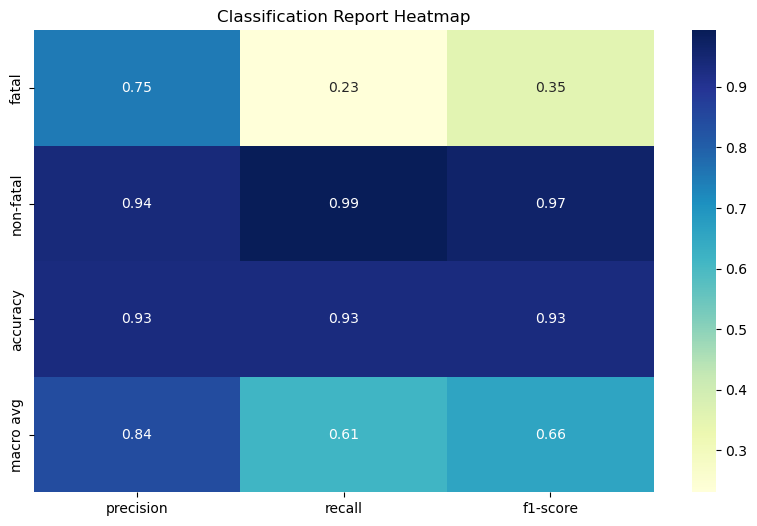

In [26]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Convert the report into a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()


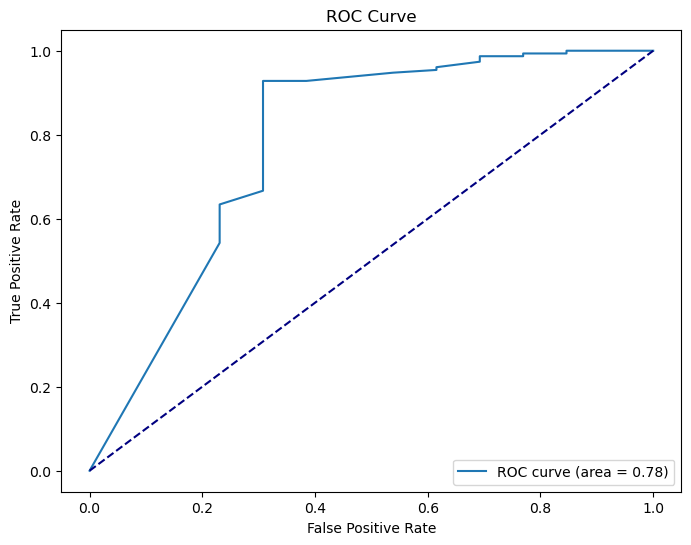

In [27]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for the model
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


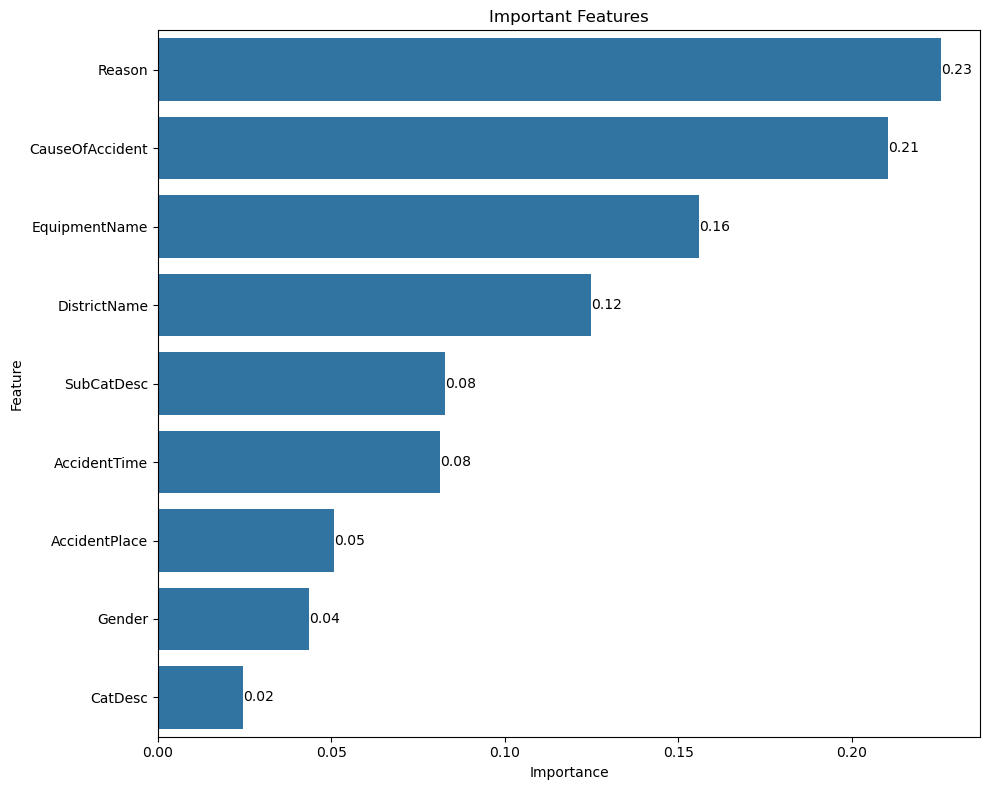

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Get feature importance from the Random Forest model
importances = rf_model.feature_importances_

# Step 9: Create a DataFrame for better visualization
feature_names = X.columns  # These are your encoded features
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Step 10: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 11: Plot the feature importance and add numbers on the bars
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Visualize top 10 features
plt.title('Important Features')

# Add numbers on the bars
for index, value in enumerate(feature_importance_df['Importance'].head(10)):
    plt.text(value, index, f'{value:.2f}', color='black', va='center')  # Format to two decimal places

plt.tight_layout()
plt.show()


C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\3266436607.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette="viridis")  # Visualize top 10 features


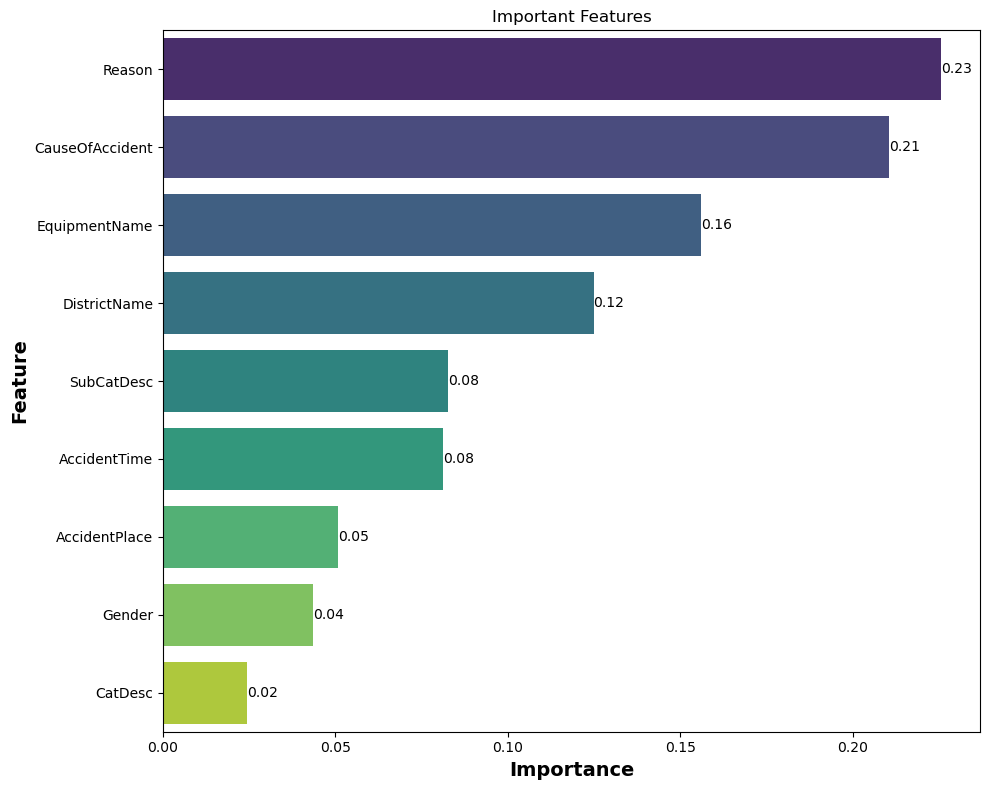

In [4]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Get feature importance from the Random Forest model
importances = rf_model.feature_importances_

# Step 9: Create a DataFrame for better visualization
feature_names = X.columns  # These are your encoded features
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Step 10: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 11: Plot the feature importance and add numbers on the bars
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette="viridis")  # Visualize top 10 features
plt.title('Important Features')

# Customize axis labels for size and weight
plt.xlabel('Importance', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Feature', fontsize=14, fontweight='bold', color='black')

# Add numbers on the bars
for index, value in enumerate(feature_importance_df['Importance'].head(10)):
    plt.text(value, index, f'{value:.2f}', color='black', va='center', fontsize=10)  # Format to two decimal places

plt.tight_layout()
plt.show()


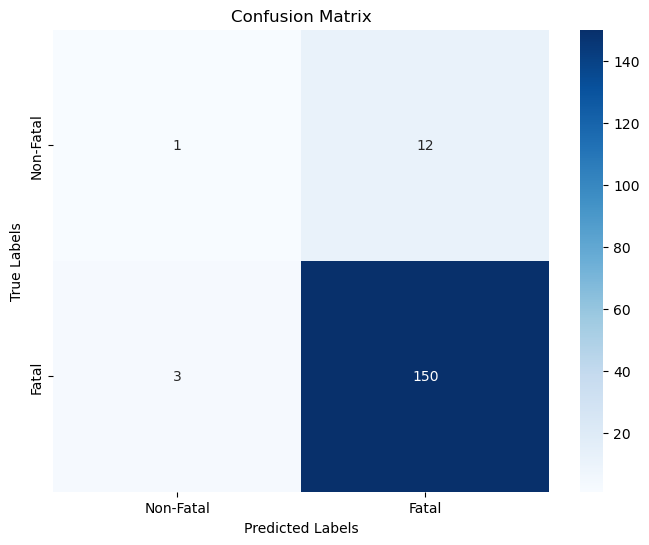

In [5]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Generate predictions
y_pred = rf_model.predict(X_test)

# Step 9: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 10: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fatal", "Fatal"], yticklabels=["Non-Fatal", "Fatal"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

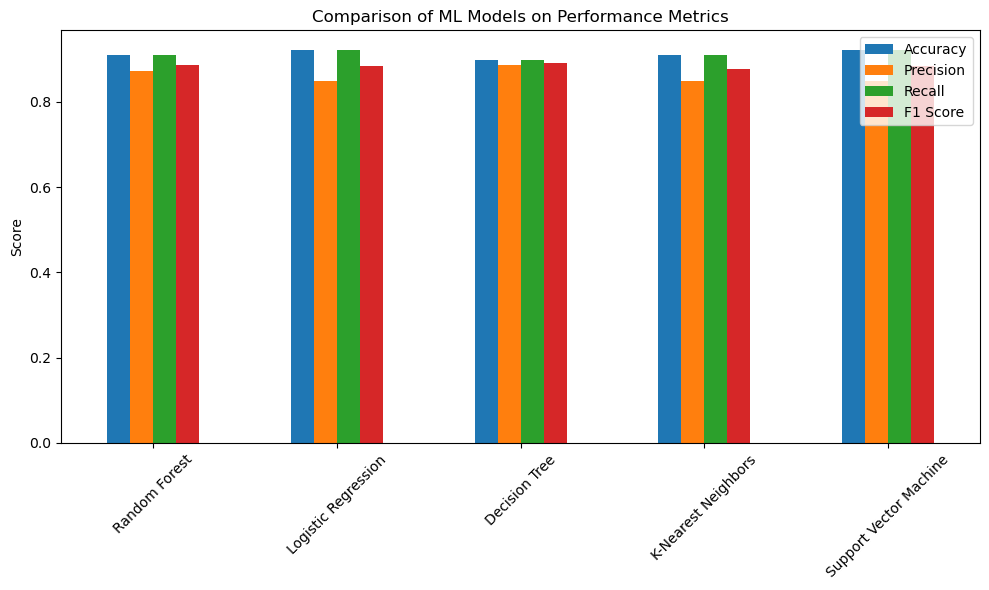

Model Comparison:
                        Accuracy  Precision    Recall  F1 Score
Random Forest           0.909639   0.872992  0.909639  0.887010
Logistic Regression     0.921687   0.849506  0.921687  0.884126
Decision Tree           0.897590   0.886098  0.897590  0.891409
K-Nearest Neighbors     0.909639   0.848626  0.909639  0.878074
Support Vector Machine  0.921687   0.849506  0.921687  0.884126


In [6]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Step 9: Display the results in a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Step 10: Plot a comparison of the models
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of ML Models on Performance Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 11: Display the results
print("Model Comparison:")
print(results_df)


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1400x800 with 0 Axes>

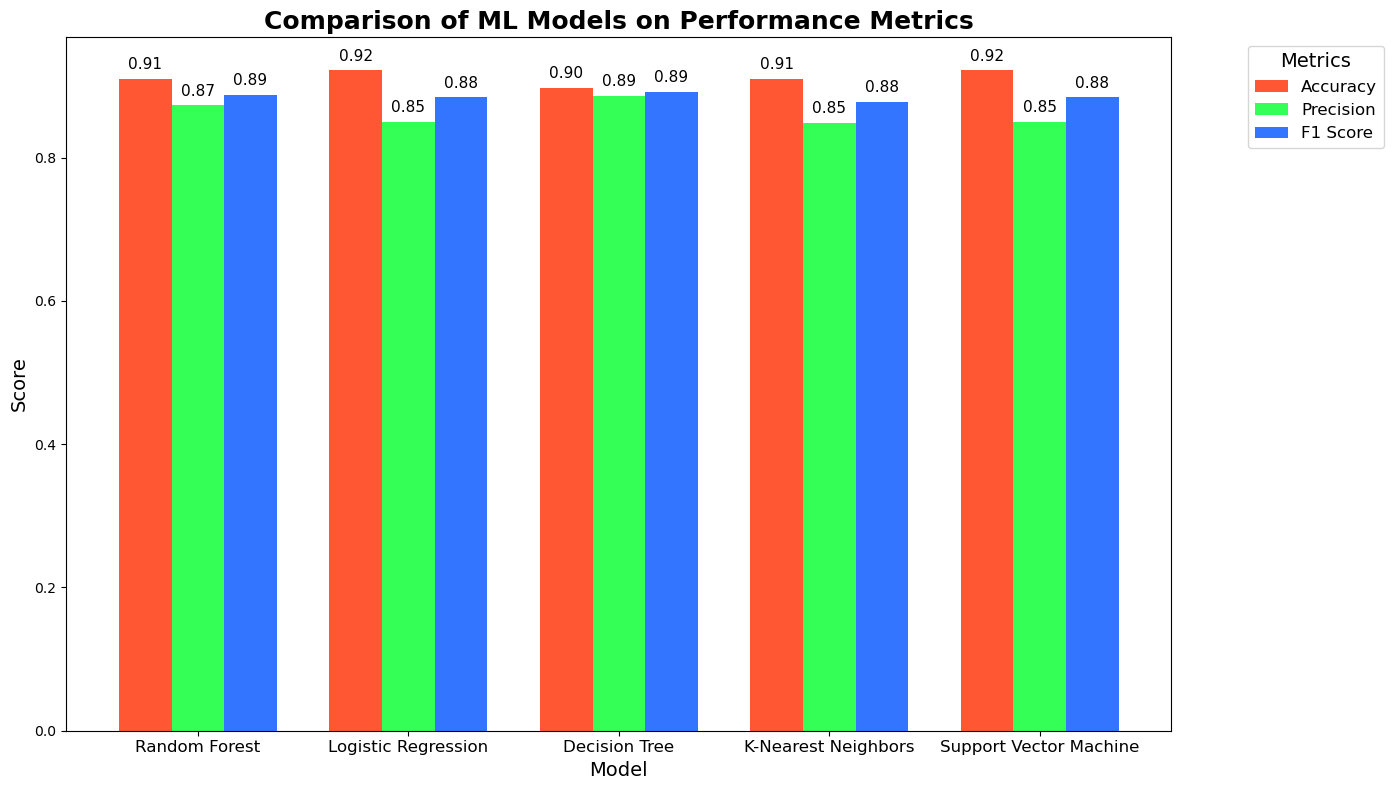

Model Comparison:
                        Accuracy  Precision  F1 Score
Random Forest           0.909639   0.872992  0.887010
Logistic Regression     0.921687   0.849506  0.884126
Decision Tree           0.897590   0.886098  0.891409
K-Nearest Neighbors     0.909639   0.848626  0.878074
Support Vector Machine  0.921687   0.849506  0.884126


In [13]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1
    }

# Step 9: Display the results in a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Step 10: Plot a comparison of the models
plt.figure(figsize=(14, 8))

# Manually define colors for the metrics
custom_colors = ['#FF5733', '#33FF57', '#3375FF']  # Custom colors for the bars

# Create the bar plot with wider bars to avoid text collision
ax = results_df.plot(kind='bar', color=custom_colors, width=0.75, figsize=(14, 8))

# Set the title and axis labels
plt.title('Comparison of ML Models on Performance Metrics', fontsize=18, fontweight='bold')
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model', fontsize=14)

# Ensure the model names (x-axis) are displayed horizontally
plt.xticks(rotation=0, ha='center', fontsize=12)

# Loop through each bar and add the value on top
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 7),
                textcoords='offset points')

# Adjust the legend position and format to avoid overlap
plt.legend(title='Metrics', fontsize=12, title_fontsize=14, loc='upper right', bbox_to_anchor=(1.2, 1))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Step 11: Display the results
print("Model Comparison:")
print(results_df)


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packag

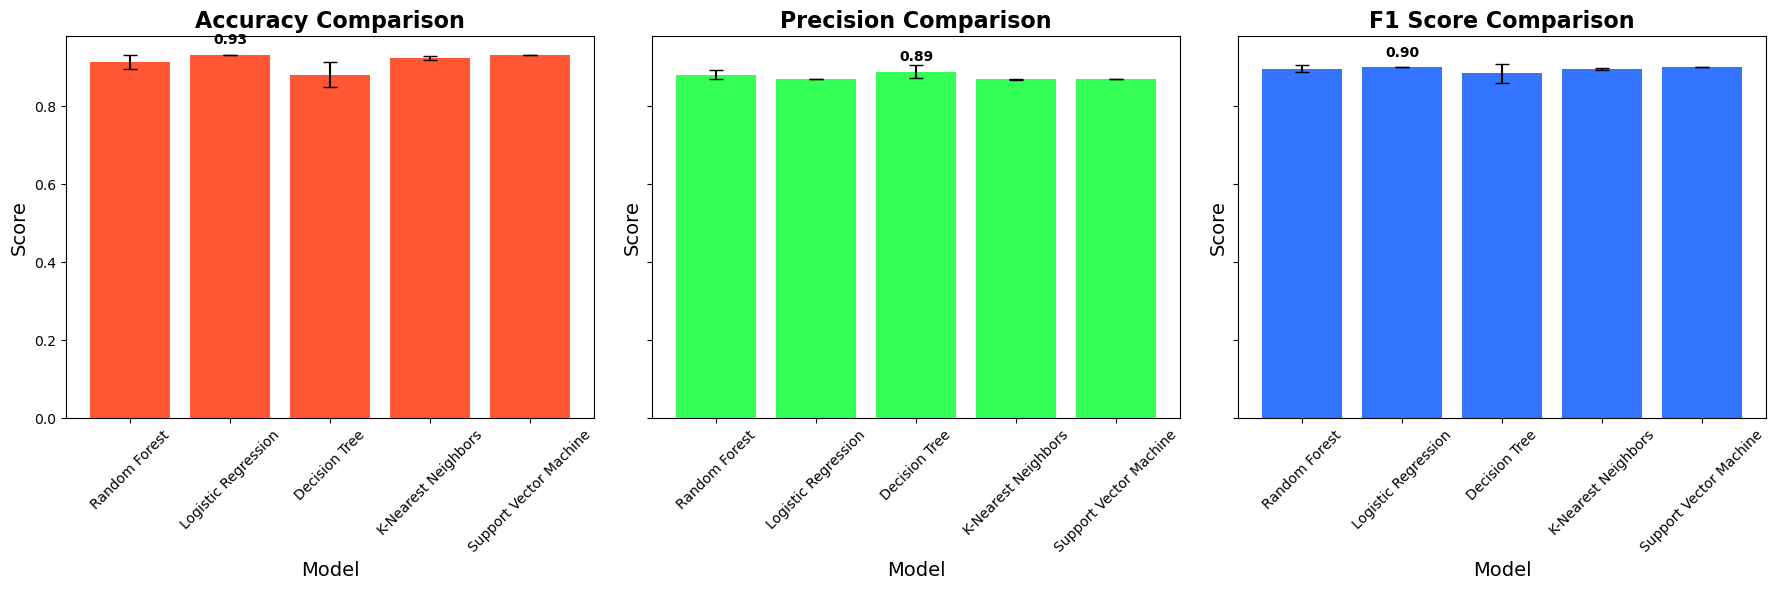

Model Comparison with Mean Scores and Standard Deviations:
                        Accuracy  Precision  F1 Score
Random Forest           0.914183   0.881041  0.895970
Logistic Regression     0.932228   0.869050  0.899531
Decision Tree           0.881078   0.888669  0.884305
K-Nearest Neighbors     0.923206   0.868473  0.894996
Support Vector Machine  0.932228   0.869050  0.899531

Standard Deviations:
                        Accuracy  Precision  F1 Score
Random Forest           0.018069   0.011888  0.009453
Logistic Regression     0.000205   0.000382  0.000300
Decision Tree           0.032602   0.016444  0.023608
K-Nearest Neighbors     0.005464   0.000237  0.002599
Support Vector Machine  0.000205   0.000382  0.000300


In [6]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

# Step 8: Train, predict, and evaluate each model with cross-validation for stability
results = {}
cv = 5  # Number of folds for cross-validation

for model_name, model in models.items():
    # Train the model and evaluate using cross-validation for stability
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision_weighted')
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted')
    
    # Store the mean and standard deviation of the scores
    results[model_name] = {
        'Accuracy': (np.mean(accuracy_scores), np.std(accuracy_scores)),
        'Precision': (np.mean(precision_scores), np.std(precision_scores)),
        'F1 Score': (np.mean(f1_scores), np.std(f1_scores))
    }

# Step 9: Convert results to DataFrame for easier plotting
metrics = ['Accuracy', 'Precision', 'F1 Score']
results_df = pd.DataFrame({metric: {model: results[model][metric][0] for model in results} for metric in metrics})
results_std_df = pd.DataFrame({metric: {model: results[model][metric][1] for model in results} for metric in metrics})

# Step 10: Plotting each metric separately with error bars
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
custom_colors = ['#FF5733', '#33FF57', '#3375FF']

for idx, metric in enumerate(metrics):
    axes[idx].bar(results_df.index, results_df[metric], color=custom_colors[idx], yerr=results_std_df[metric], capsize=5)
    axes[idx].set_title(f'{metric} Comparison', fontsize=16, fontweight='bold')
    axes[idx].set_ylabel('Score', fontsize=14)
    axes[idx].set_xlabel('Model', fontsize=14)
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Annotate top model
    top_model_idx = results_df[metric].idxmax()
    top_score = results_df[metric].max()
    axes[idx].text(top_model_idx, top_score + 0.02, f'{top_score:.2f}', ha='center', va='bottom', fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Step 11: Display the results
print("Model Comparison with Mean Scores and Standard Deviations:")
print(results_df)
print("\nStandard Deviations:")
print(results_std_df)


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


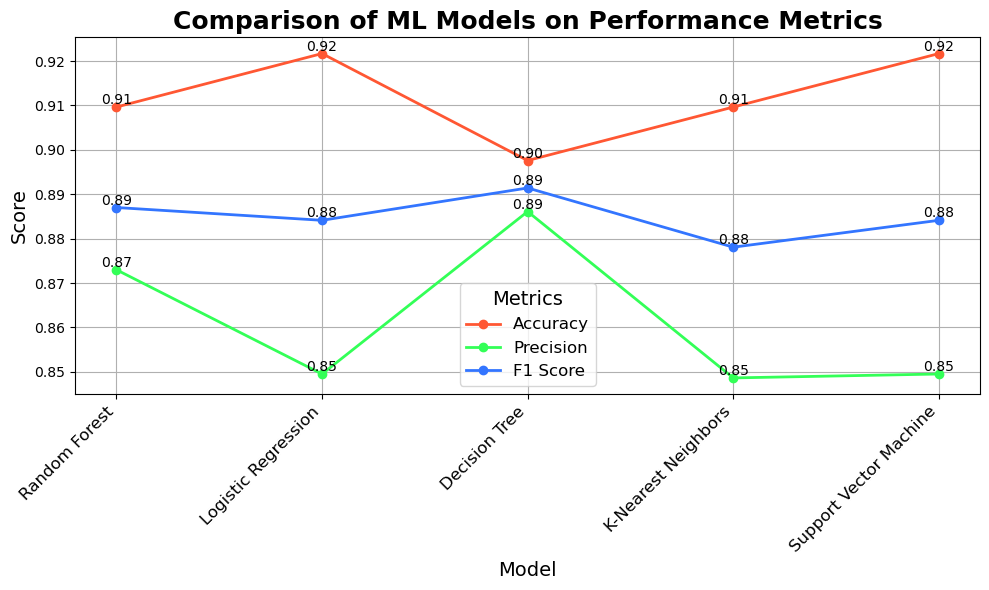

Model Comparison:
                        Accuracy  Precision  F1 Score
Random Forest           0.909639   0.872992  0.887010
Logistic Regression     0.921687   0.849506  0.884126
Decision Tree           0.897590   0.886098  0.891409
K-Nearest Neighbors     0.909639   0.848626  0.878074
Support Vector Machine  0.921687   0.849506  0.884126


In [14]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1
    }

# Step 9: Display the results in a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Step 10: Plot a line graph to compare the models
plt.figure(figsize=(10, 6))

# Custom colors for the lines
custom_colors = ['#FF5733', '#33FF57', '#3375FF']

# Plot Accuracy, Precision, and F1 Score
plt.plot(results_df.index, results_df['Accuracy'], marker='o', color=custom_colors[0], label='Accuracy', linewidth=2)
plt.plot(results_df.index, results_df['Precision'], marker='o', color=custom_colors[1], label='Precision', linewidth=2)
plt.plot(results_df.index, results_df['F1 Score'], marker='o', color=custom_colors[2], label='F1 Score', linewidth=2)

# Add titles and labels
plt.title('Comparison of ML Models on Performance Metrics', fontsize=18, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add values on each line point
for i in range(len(results_df)):
    plt.text(i, results_df['Accuracy'].iloc[i], f"{results_df['Accuracy'].iloc[i]:.2f}", ha='center', va='bottom', fontsize=10, color='black')
    plt.text(i, results_df['Precision'].iloc[i], f"{results_df['Precision'].iloc[i]:.2f}", ha='center', va='bottom', fontsize=10, color='black')
    plt.text(i, results_df['F1 Score'].iloc[i], f"{results_df['F1 Score'].iloc[i]:.2f}", ha='center', va='bottom', fontsize=10, color='black')

# Display the legend and grid
plt.legend(title='Metrics', fontsize=12, title_fontsize=14)
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Step 11: Display the results
print("Model Comparison:")
print(results_df)


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\1726568543.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")


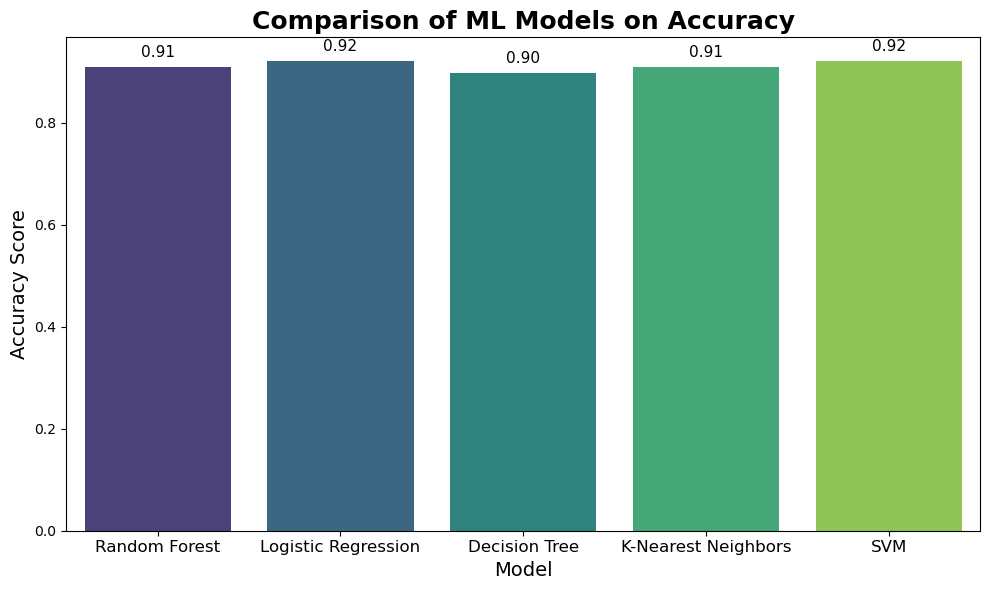

C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\1726568543.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")


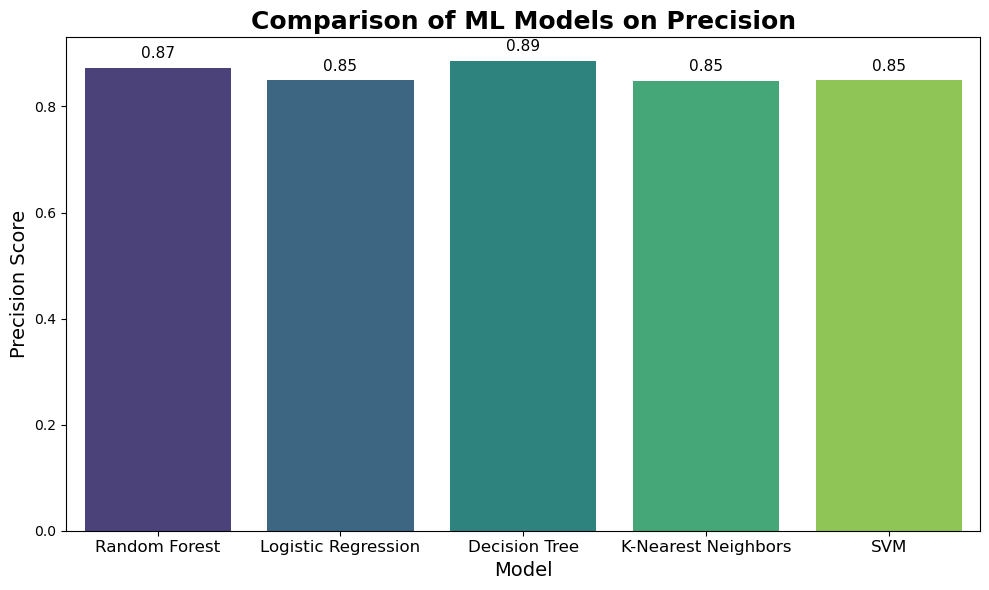

C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\1726568543.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")


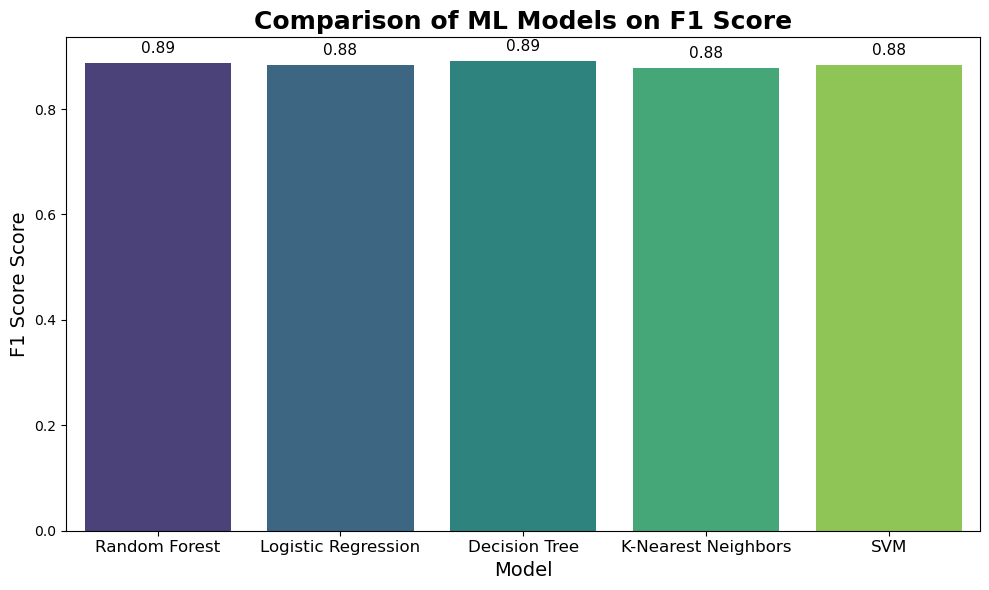

In [8]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1
    }

# Step 9: Display the results in a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Step 10: Function to plot one metric at a time
def plot_metric(metric_name):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")
    
    # Set title and labels
    plt.title(f'Comparison of ML Models on {metric_name}', fontsize=18, fontweight='bold')
    plt.ylabel(f'{metric_name} Score', fontsize=14)
    plt.xlabel('Model', fontsize=14)
    
    # Ensure the model names (x-axis) are displayed horizontally
    plt.xticks(rotation=0, ha='center', fontsize=12)

    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 7),
                    textcoords='offset points')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Step 11: Plot each metric separately
plot_metric('Accuracy')    # Plot for Accuracy
plot_metric('Precision')   # Plot for Precision
plot_metric('F1 Score')    # Plot for F1 Score


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\2961123109.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")


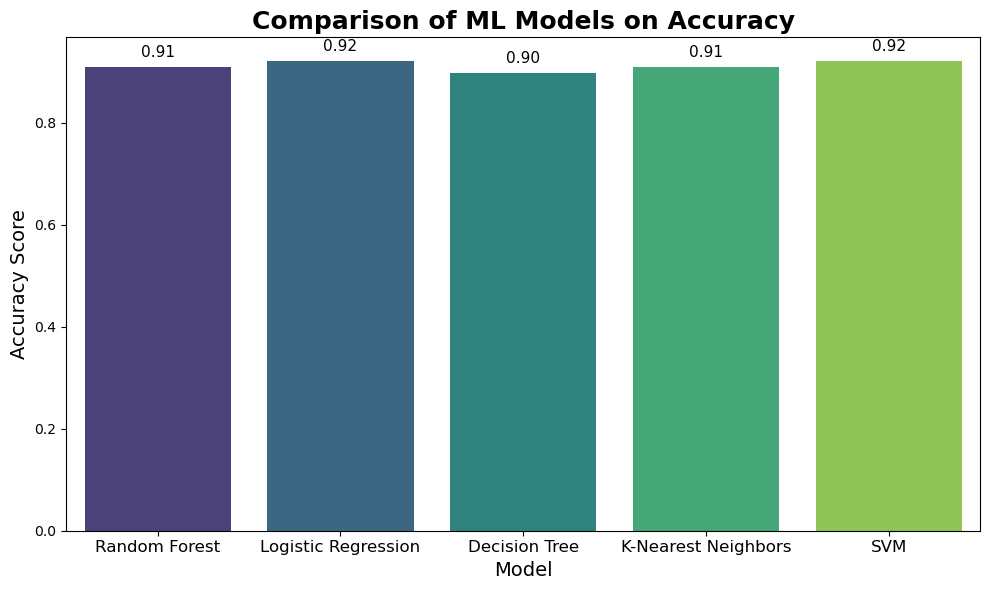

C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\2961123109.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")


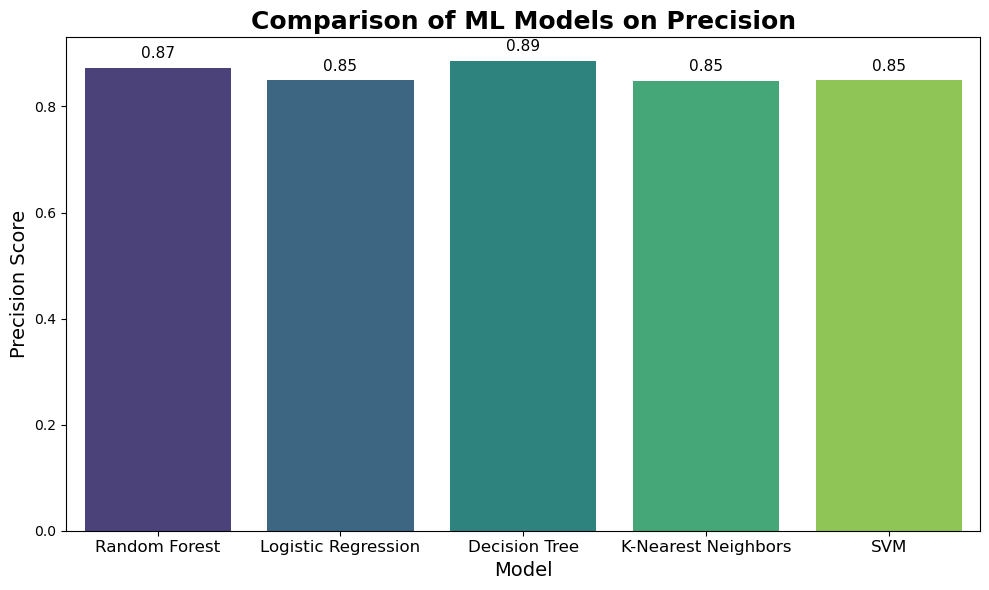

C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\2961123109.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")


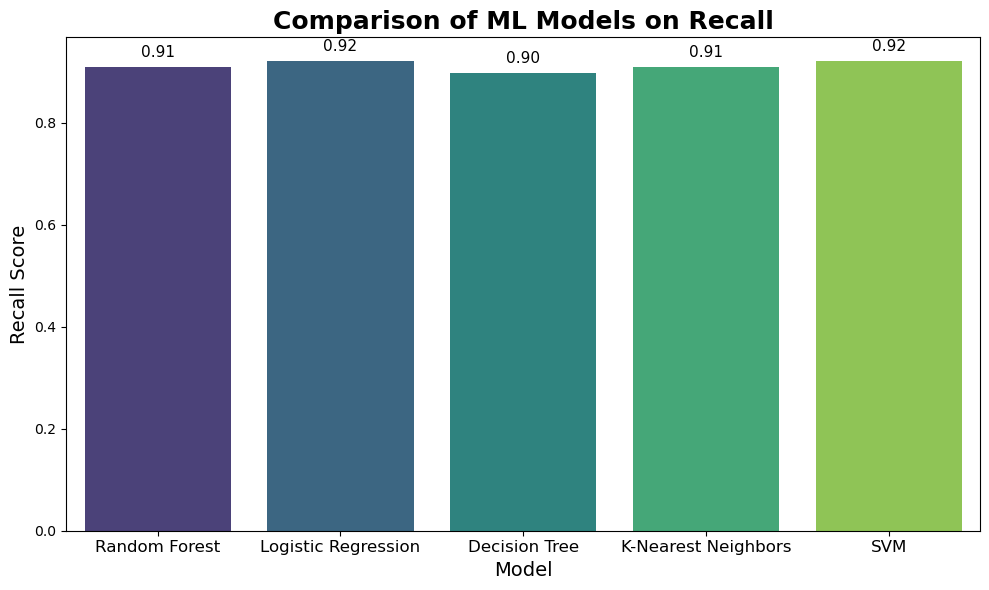

C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\2961123109.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")


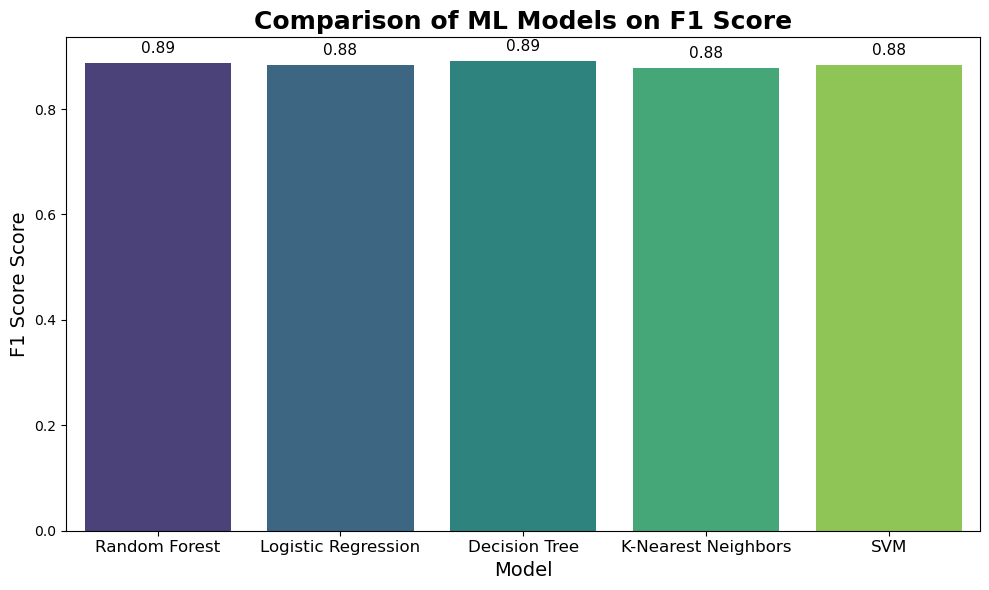

In [9]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Step 9: Display the results in a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Step 10: Function to plot one metric at a time
def plot_metric(metric_name):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")
    
    # Set title and labels
    plt.title(f'Comparison of ML Models on {metric_name}', fontsize=18, fontweight='bold')
    plt.ylabel(f'{metric_name} Score', fontsize=14)
    plt.xlabel('Model', fontsize=14)
    
    # Ensure the model names (x-axis) are displayed horizontally
    plt.xticks(rotation=0, ha='center', fontsize=12)

    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 7),
                    textcoords='offset points')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Step 11: Plot each metric separately
plot_metric('Accuracy')    # Plot for Accuracy
plot_metric('Precision')   # Plot for Precision
plot_metric('Recall')      # Plot for Recall
plot_metric('F1 Score')    # Plot for F1 Score


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\3497361842.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")


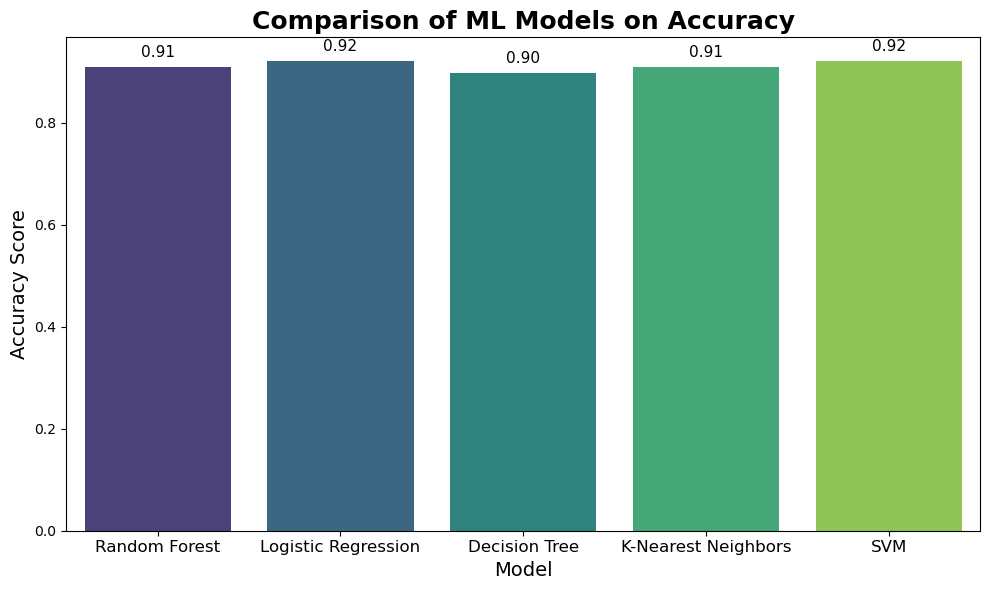

C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\3497361842.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")


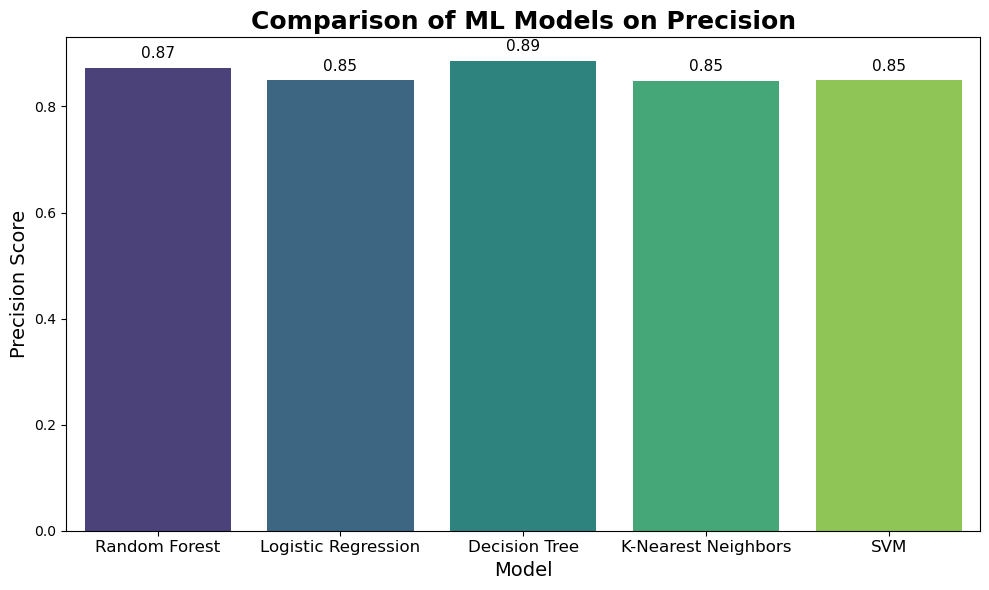

C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\3497361842.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")


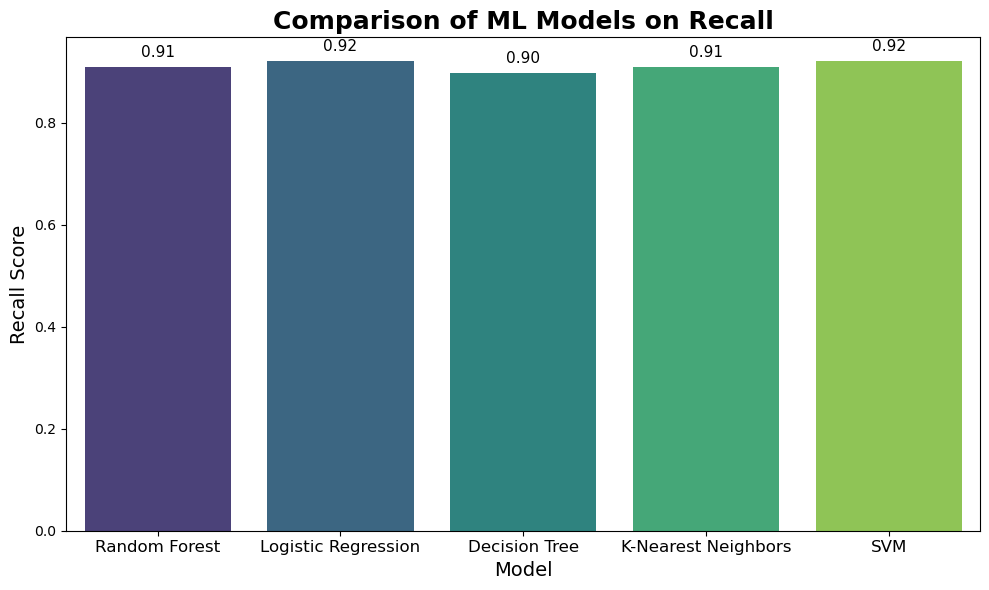

C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\3497361842.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")


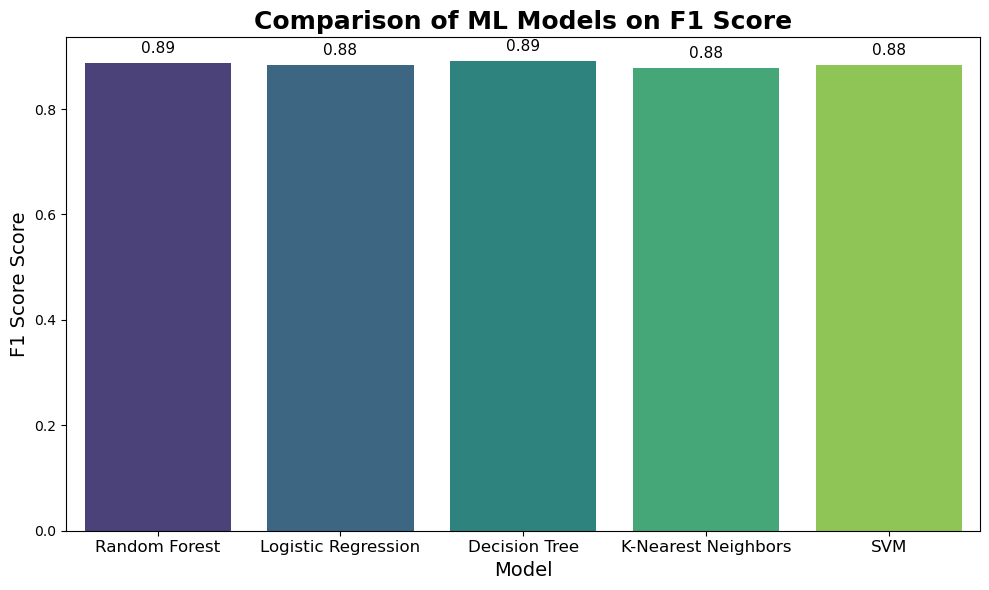

C:\Users\02ris\AppData\Local\Temp\ipykernel_16848\3497361842.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")


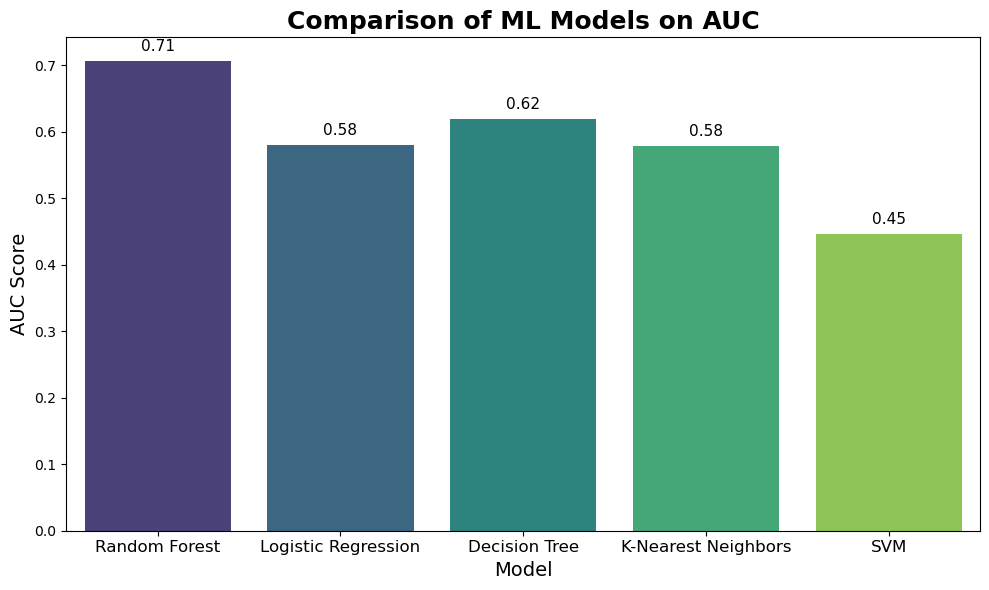

Model Comparison:
                     Accuracy  Precision    Recall  F1 Score       AUC
Random Forest        0.909639   0.872992  0.909639  0.887010  0.706385
Logistic Regression  0.921687   0.849506  0.921687  0.884126  0.579688
Decision Tree        0.897590   0.886098  0.897590  0.891409  0.618653
K-Nearest Neighbors  0.909639   0.848626  0.909639  0.878074  0.578180
SVM                  0.921687   0.849506  0.921687  0.884126  0.446456


In [11]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Save the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }

# Step 9: Display the results in a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Step 10: Function to plot one metric at a time
def plot_metric(metric_name):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=results_df.index, y=results_df[metric_name], palette="viridis")
    
    # Set title and labels
    plt.title(f'Comparison of ML Models on {metric_name}', fontsize=18, fontweight='bold')
    plt.ylabel(f'{metric_name} Score', fontsize=14)
    plt.xlabel('Model', fontsize=14)
    
    # Ensure the model names (x-axis) are displayed horizontally
    plt.xticks(rotation=0, ha='center', fontsize=12)

    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 7),
                    textcoords='offset points')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Step 11: Plot each metric separately
plot_metric('Accuracy')
plot_metric('Precision')
plot_metric('Recall')
plot_metric('F1 Score')
plot_metric('AUC')

# Step 12: Display the results
print("Model Comparison:")
print(results_df)


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


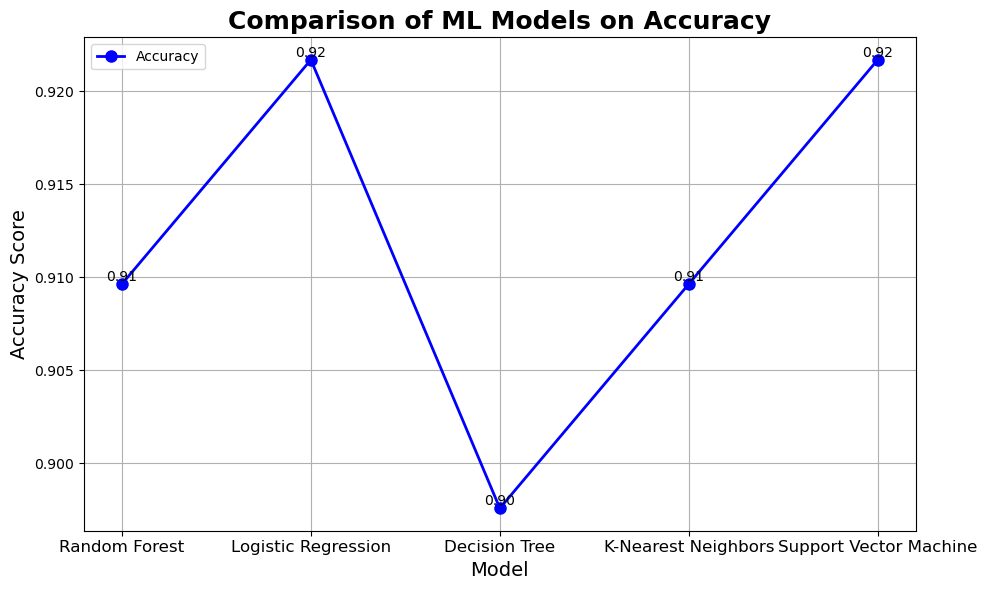

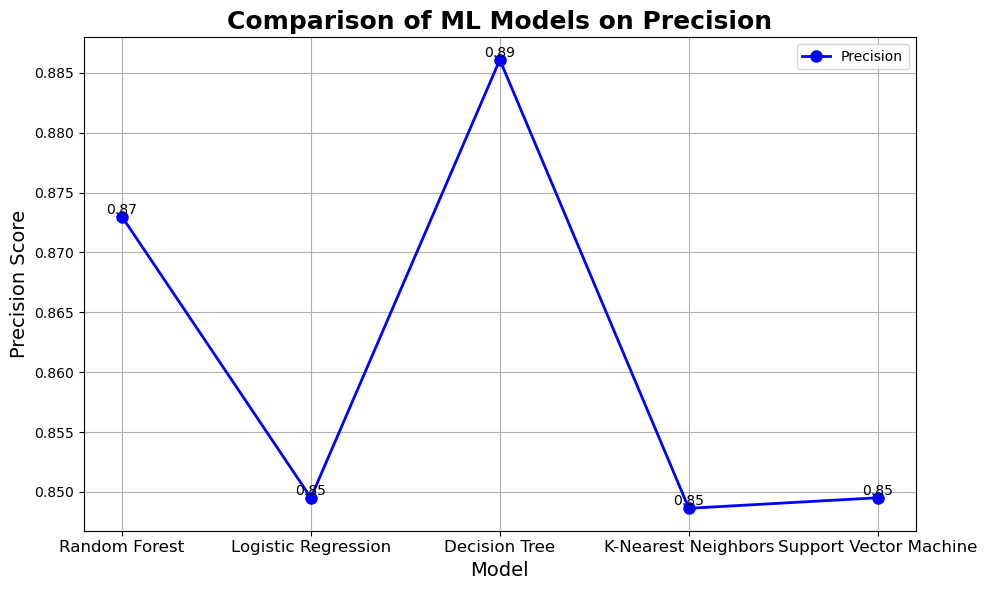

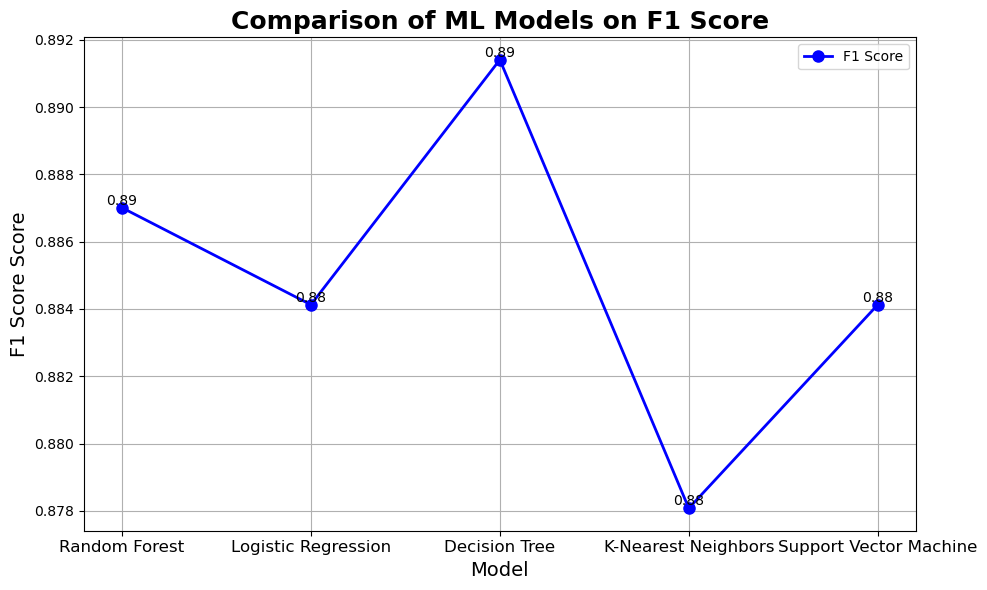

In [16]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1
    }

# Step 9: Display the results in a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Step 10: Function to plot one metric at a time using a line graph
def plot_metric_line(metric_name):
    plt.figure(figsize=(10, 6))
    
    # Plot the line graph
    plt.plot(results_df.index, results_df[metric_name], marker='o', color='blue', linewidth=2, markersize=8, label=metric_name)
    
    # Set the title and labels
    plt.title(f'Comparison of ML Models on {metric_name}', fontsize=18, fontweight='bold')
    plt.ylabel(f'{metric_name} Score', fontsize=14)
    plt.xlabel('Model', fontsize=14)
    
    # Ensure the model names (x-axis) are displayed horizontally
    plt.xticks(rotation=0, ha='center', fontsize=12)

    # Add values on top of the points
    for i in range(len(results_df)):
        plt.text(i, results_df[metric_name].iloc[i], f"{results_df[metric_name].iloc[i]:.2f}", ha='center', va='bottom', fontsize=10, color='black')
    
    # Display the grid and the legend
    plt.grid(True)
    plt.legend(loc='best')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Step 11: Plot each metric separately using a line graph
plot_metric_line('Accuracy')    # Plot for Accuracy
plot_metric_line('Precision')   # Plot for Precision
plot_metric_line('F1 Score')    # Plot for F1 Score


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


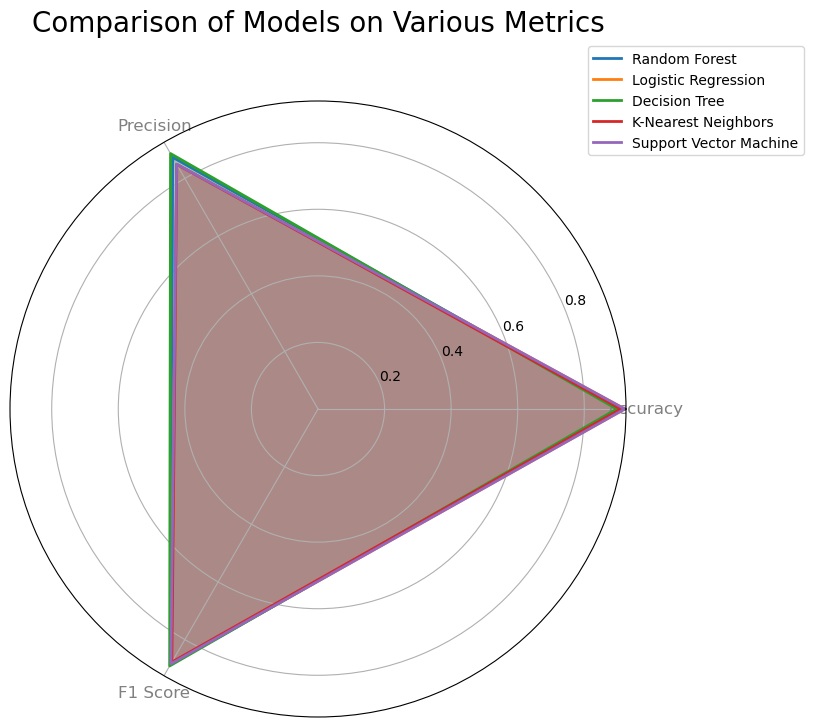

In [17]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
from math import pi

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1
    }

# Step 9: Display the results in a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Step 10: Radar Chart Plot Function
def radar_chart_plot(metrics):
    # Number of metrics we're plotting
    num_vars = len(metrics)
    
    # Compute angle of each axis
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]  # Complete the loop
    
    # Initialize the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Plot each model on the radar chart
    for model in results_df.index:
        values = results_df.loc[model].values.flatten().tolist()
        values += values[:1]  # Complete the loop
        
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)
        ax.fill(angles, values, alpha=0.25)
    
    # Labels for each metric
    plt.xticks(angles[:-1], metrics, color='grey', size=12)
    
    # Add title and legend
    plt.title("Comparison of Models on Various Metrics", size=20, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    
    # Show the plot
    plt.show()

# Step 11: Plot the radar chart
metrics = ['Accuracy', 'Precision', 'F1 Score']
radar_chart_plot(metrics)


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


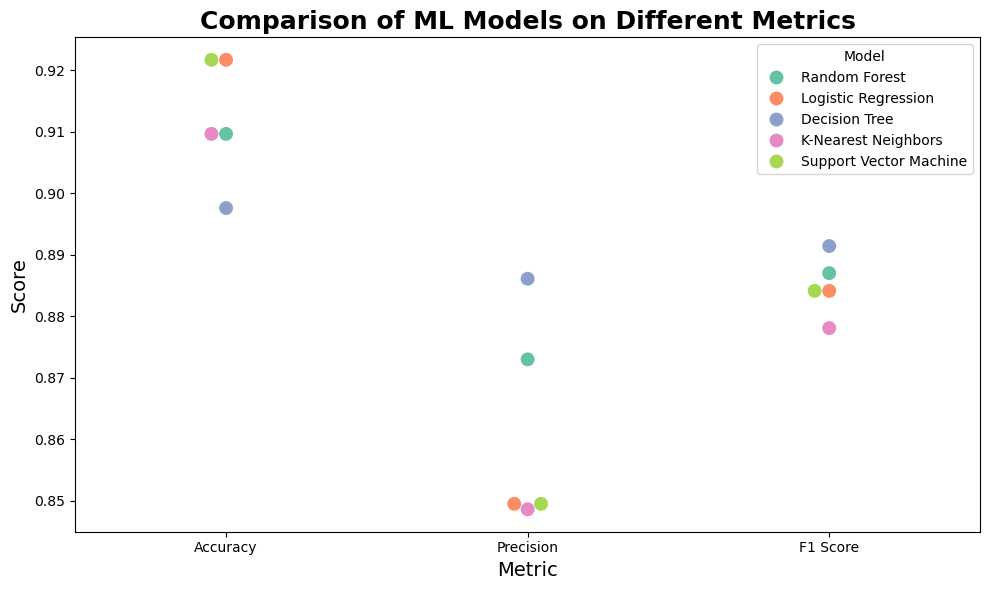

In [18]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1
    })

# Step 9: Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Step 10: Melt the DataFrame to prepare for plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Step 11: Create the Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Metric', y='Score', hue='Model', data=results_melted, palette='Set2', size=10)

# Set title and labels
plt.title('Comparison of ML Models on Different Metrics', fontsize=18, fontweight='bold')
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metric', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


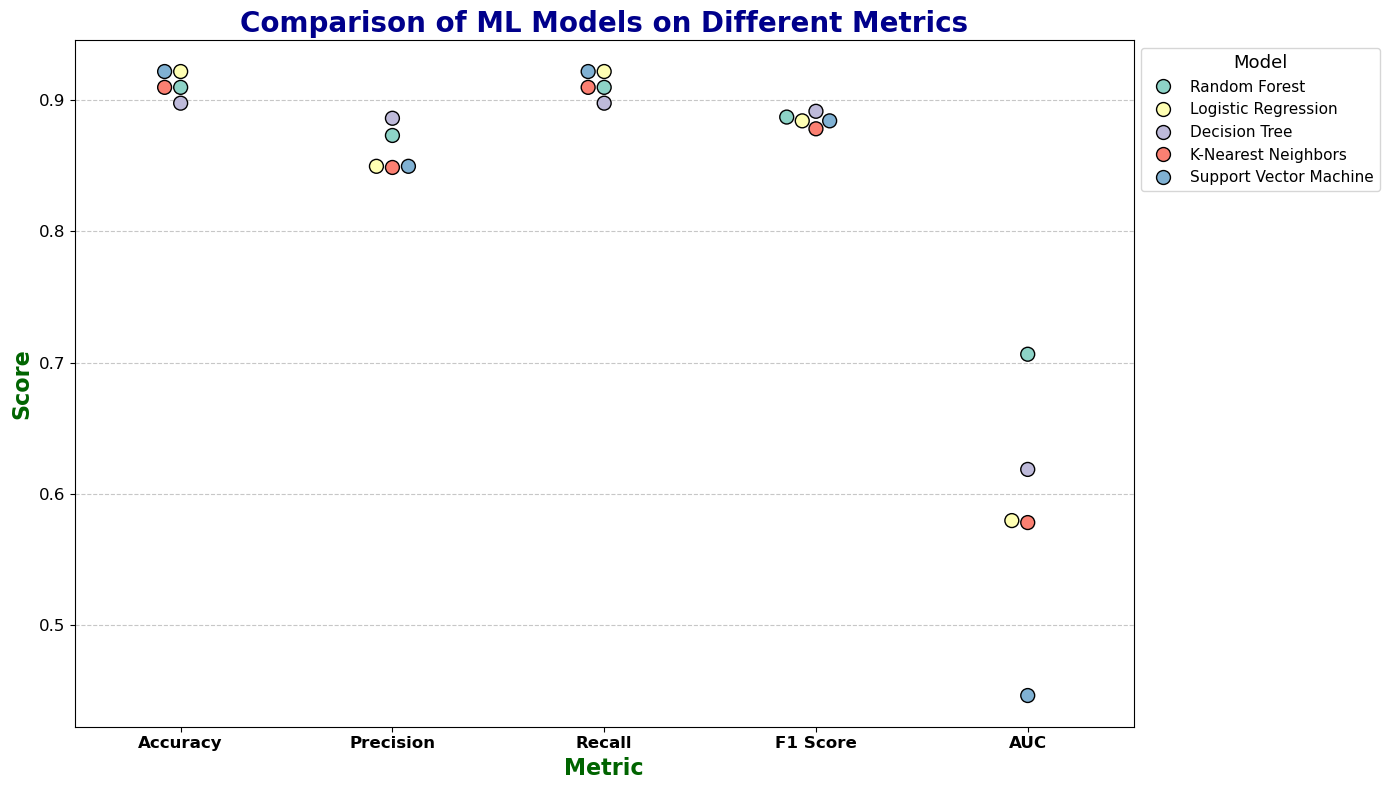

In [12]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Save the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    })

# Step 9: Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Step 10: Melt the DataFrame to prepare for plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Step 11: Customize color palette for more visual appeal
custom_palette = sns.color_palette("Set3", len(models))

# Step 12: Create the Swarm Plot
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Metric', y='Score', hue='Model', data=results_melted, palette=custom_palette, size=10, edgecolor='k', linewidth=1)

# Set title and labels with improved aesthetics
plt.title('Comparison of ML Models on Different Metrics', fontsize=20, fontweight='bold', color='darkblue')
plt.ylabel('Score', fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel('Metric', fontsize=16, fontweight='bold', color='darkgreen')

# Enhance the legend
plt.legend(title='Model', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better readability
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


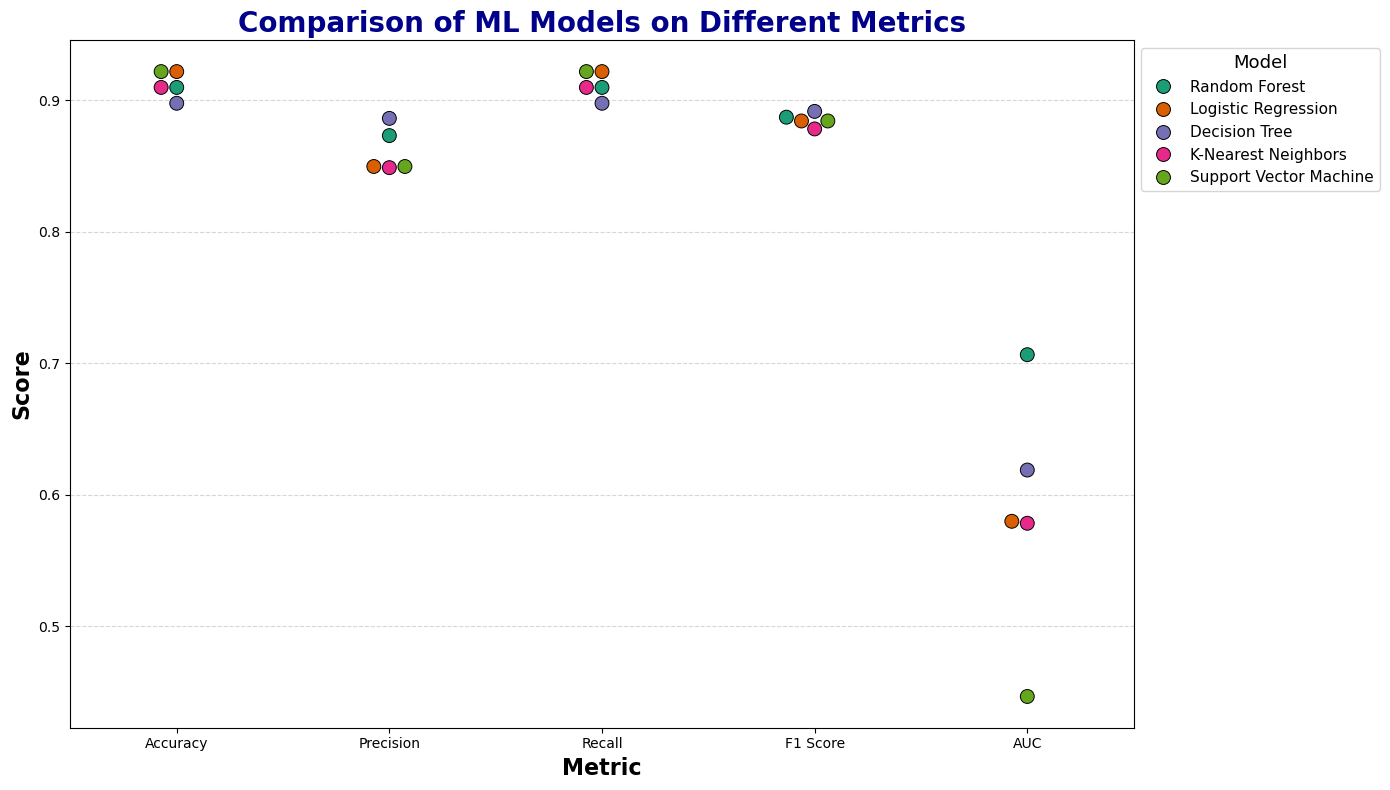

In [14]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Save the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    })

# Step 9: Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Step 10: Melt the DataFrame to prepare for plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Step 11: Create the Swarm Plot with customized colors and bigger markers
plt.figure(figsize=(14, 8))
sns.swarmplot(x='Metric', y='Score', hue='Model', data=results_melted, palette='Dark2', size=10, edgecolor='black', linewidth=0.7)

# Set title and labels with improved aesthetics
plt.title('Comparison of ML Models on Different Metrics', fontsize=20, fontweight='bold', color='darkblue')
plt.ylabel('Score', fontsize=16, fontweight='bold')
plt.xlabel('Metric', fontsize=16, fontweight='bold')

# Customize legend to make it more compact and readable
plt.legend(title='Model', title_fontsize='13', fontsize='11', loc='upper left', bbox_to_anchor=(1, 1))

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot with tight layout
plt.tight_layout()
plt.show()


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


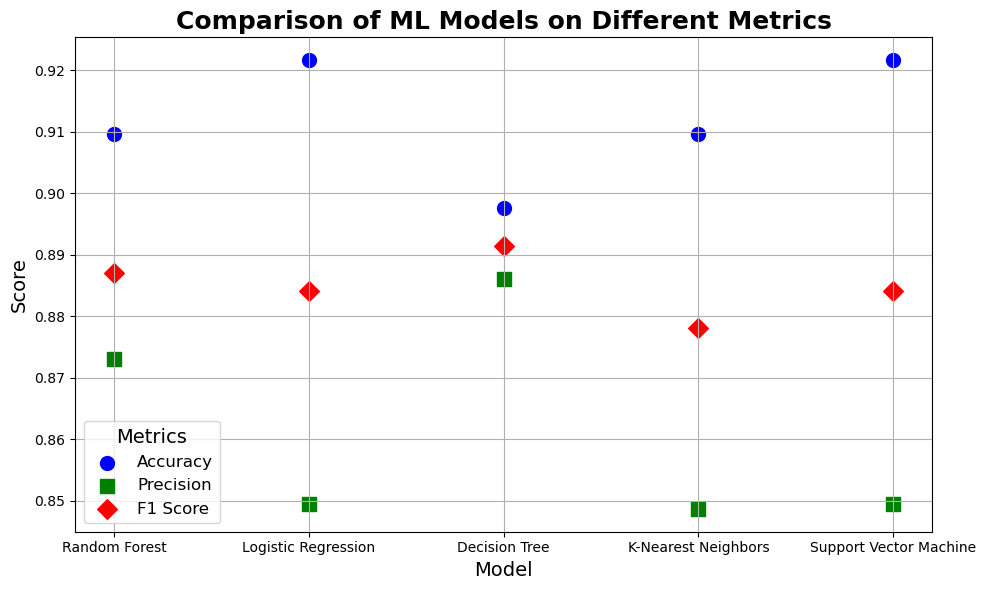

In [19]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1
    })

# Step 9: Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Step 10: Create the Scatter Plot
plt.figure(figsize=(10, 6))

# Custom markers for each model
markers = ['o', 's', 'D', '^', 'v']  # Circle, Square, Diamond, Triangle, Downward Triangle

# Plot for Accuracy
plt.scatter(results_df['Model'], results_df['Accuracy'], color='b', label='Accuracy', marker=markers[0], s=100)

# Plot for Precision
plt.scatter(results_df['Model'], results_df['Precision'], color='g', label='Precision', marker=markers[1], s=100)

# Plot for F1 Score
plt.scatter(results_df['Model'], results_df['F1 Score'], color='r', label='F1 Score', marker=markers[2], s=100)

# Set title and labels
plt.title('Comparison of ML Models on Different Metrics', fontsize=18, fontweight='bold')
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model', fontsize=14)

# Add legend and grid for clarity
plt.legend(title='Metrics', fontsize=12, title_fontsize=14)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\02ris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

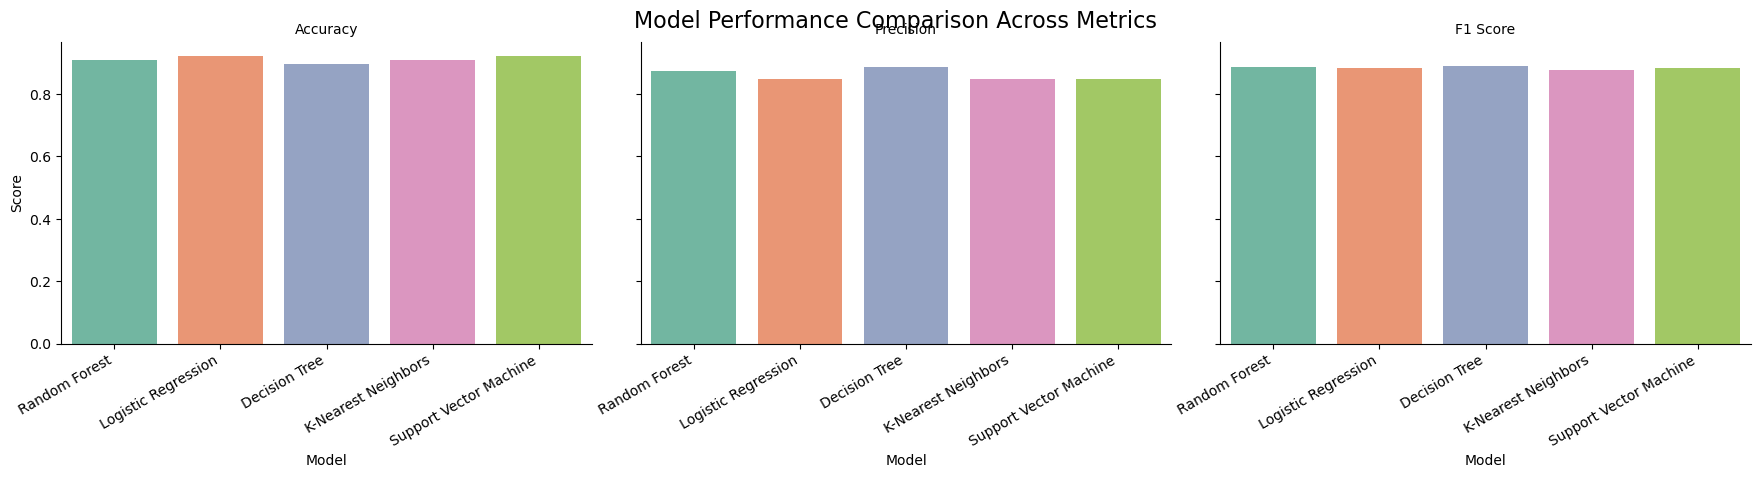

In [20]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1
    })

# Step 9: Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Step 10: Melt the DataFrame for Facet Plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Step 11: Create the Facet Plot (FacetGrid)
g = sns.FacetGrid(results_melted, col="Metric", col_wrap=3, height=4, aspect=1.5)

# Plot the data (bar plot in each facet)
g.map(sns.barplot, "Model", "Score", palette="Set2")

# Set plot titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Model", "Score")
g.set_xticklabels(rotation=30, ha="right", fontsize=10)

# Add some layout adjustments
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Model Performance Comparison Across Metrics', fontsize=16)

# Show the plot
plt.show()


c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\02ris\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


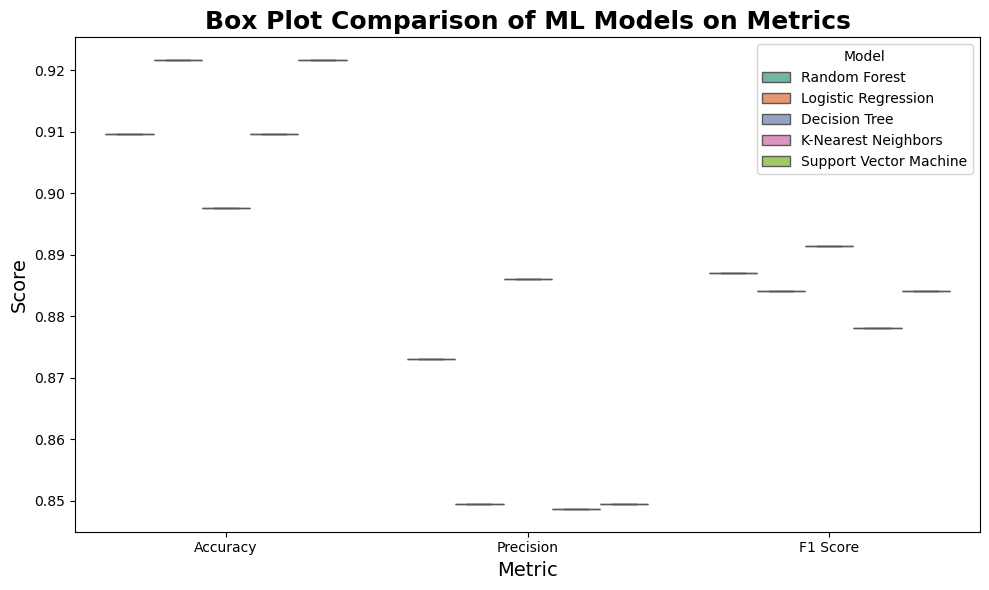

In [21]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = "C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv"
data = pd.read_csv(file_path)

# Step 3: Select features and target
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc', 'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason']
target = 'AccidentType'

# Step 4: Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Step 5: Encode target variable
data[target] = encoder.fit_transform(data[target])

# Step 6: Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Define models to be compared
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

# Step 8: Train, predict, and evaluate each model
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model using multiple metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Save the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'F1 Score': f1
    })

# Step 9: Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Step 10: Melt the DataFrame for Box Plot
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Step 11: Create the Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Metric", y="Score", data=results_melted, hue="Model", palette="Set2")

# Set plot title and labels
plt.title('Box Plot Comparison of ML Models on Metrics', fontsize=18, fontweight='bold')
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metric', fontsize=14)

# Adjust layout and show plot
plt.tight_layout()
plt.show()
